<table>
  <tr>
    <td><p style="font-size:45px; color: #55BBD2">Analysis of light microscopy images in Python</p></td>
    <td><img src="../ressources/lmb_logo.svg" alt="LMB Logo" width="500" height="600" align="right"></td>
  </tr>
</table>
<table>
  <tr>
    <td><p style="font-size:15px; color: #55BBD2">Version: September 2025</p></td>
  </tr>
</table>

# Part 4 Fine-tune CellPose model in the GUI

<b>Live Demo:</b> Human-in-the-loop (HITL) in [Cellpose 2.0](https://www.nature.com/articles/s41592-022-01663-4) allows users to improve segmentation by correcting masks and retraining the model directly in the GUI. It's useful when pretrained models underperform or when a custom model is needed. With just a few manual corrections, users can adapt Cellpose to their data without coding, enabling fast and effective segmentation refinement.

<b>Dataset 2:</b> Human_in_the_loop folder

<img src="../ressources/data3.png" alt="drawing" width="400"/>

<b>Credit:</b> [LIVECell dataset](https://sartorius-research.github.io/LIVECell/) © 2021 Ulman, C., Moen, E., Bannon, D. et al. Licensed under CC BY-NC 4.0. Ulman, C., Moen, E., Bannon, D. et al. An annotated dataset for live-cell imaging. Nature Methods 18, 963–965 (2021). [https://doi.org/10.1038/s41592-021-01249-6]

<b>Workflow:</b>

<img src="../ressources/hitl.png" alt="drawing" width="800"/>

<b>Objectives:</b>
- Launch CellPose GUI from notebook (!) 
- Retrain custom models using the CellPose GUI 
- Use the custom models with Python

Launch Cellpose GUI from Mac; go to the next cell when using Windows

In [3]:
def launch_cellpose_gui():
    import os
    import subprocess

    os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
    subprocess.Popen(["cellpose", "gui"])

# Run it
launch_cellpose_gui()

! python3 -m cellpose

2025-09-25 15:54:32,088 [INFO] WRITING LOG OUTPUT TO /Users/qwu/.cellpose/run.log
2025-09-25 15:54:32,088 [INFO] 
cellpose version: 	3.1.1.2 
platform:       	darwin 
python version: 	3.10.18 
torch version:  	2.8.0


usage: cellpose [-h] [--version] [--verbose] [--Zstack] [--use_gpu]
                [--gpu_device GPU_DEVICE] [--check_mkl] [--dir DIR]
                [--image_path IMAGE_PATH] [--look_one_level_down]
                [--img_filter IMG_FILTER] [--channel_axis CHANNEL_AXIS]
                [--z_axis Z_AXIS] [--chan CHAN] [--chan2 CHAN2] [--invert]
                [--all_channels] [--pretrained_model PRETRAINED_MODEL]
                [--restore_type RESTORE_TYPE] [--chan2_restore]
                [--add_model ADD_MODEL] [--transformer]
                [--pretrained_model_ortho PRETRAINED_MODEL_ORTHO]
                [--no_resample] [--no_interp] [--no_norm]
                [--norm_percentile VALUE1 VALUE2] [--do_3D]
                [--diameter DIAMETER] [--stitch_threshold STITCH_THRESHOLD]
                [--min_size MIN_SIZE] [--flow3D_smooth FLOW3D_SMOOTH]
                [--flow_threshold FLOW_THRESHOLD]
                [--cellprob_threshold CELLPROB_THRESHOLD] [--niter NITER]
      

2025-09-25 15:54:34,521 [INFO] ** TORCH MPS version installed and working. **


## Launch Cellpose GUI from Windows

In [ ]:
! cellpose

## Procedures

1. Load & Configure
- Open one representative image.
- Pick a pretrained model (default **cyto3** or from **dataset-specific models**).
- Set **Channels** (main + optional aux) to match your data.
- Set **Diameter**.

2. First Pass Segmentation
- Click **Run** to generate masks.
- Inspect overlays (toggle labels on/off; use mouse wheel to zoom in on tricky regions).

3. Human Corrections (the “loop”)
- Add missing cells with rigth click and draw.
- Remove false positives with ctrl + click or **click-select** + **done**.
- This creates training-ready mask files matching the image names in the same folder.

4. Train a Custom Model
- Go to the **Models** tab:
  - **Train new model with image+mask in the folder**
  - Select your corrected images and masks folder.
  - Choose a pre-trained model (e.g., **cyto3**) and a short training run (default value usually works fine).
  - Start training 
  - Cellpose will save a model under `models/` in the same folder.
  - CellPose will automatically apply the custom model to the next image in the same folder

5. Apply the New Model
- Switch to your newly trained model in the GUI **Other models**.
- Test it on the test image.
- Spot‑check results; repeat corrections and training if needed.

Tips
- Start with **3–5 diverse images** for your first correction cycle.
- Keep early training **short** for fast iteration.
- Revisit channel/diameter settings if segmentation errors persist.


<div class="alert alert-success">

#### Exercise

Use your custom trained Cellpose model to segment new images with Python. <br>
Hint: <br>
1. Load the test image: find the DATA drive on your work station and complete the file path with image_path = 'your data drive:\TRAINING\introduction-to-python-bioimage-analysis\data\test\A172_Phase_A7_2_00d20h00m_4.tif'
2. Give the path to your custom model with model_path = '..\models\my_model'<br>
3. Load the model with model_retrain = models.CellposeModel()<br>
4. Run model_retrain.eval() on your test image<br>
5. Display the results using matplotlib

</div>

In [4]:
from pathlib import Path
from bioio import BioImage

data_folder = Path("../data/human_in_the_loop/test")
image_path = data_folder / "A172_Phase_A7_2_00d20h00m_4.tif"
test_img = BioImage(image_path).data
print(test_img.shape)

(1, 1, 1, 520, 704)


In [5]:
from cellpose import models

# Get the custom model
model_path = '/Users/qwu/Documents/Python_projects/Python_training_v2_data/cellpose_data/pc_train2_livecell_dataset/models/py_train_lc_2'

model_retrain = models.CellposeModel(gpu=False, pretrained_model=model_path)

mask, flows, diams = model_retrain.eval(
    test_img, channels=[0, 0], diameter=30, cellprob_threshold=1.0
)

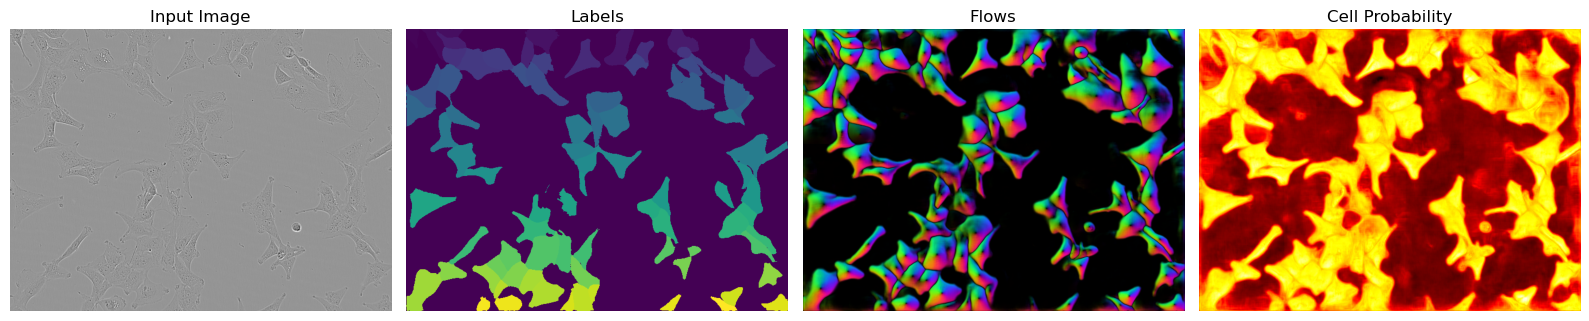

In [ ]:
import matplotlib.pyplot as plt

# Squeeze any singleton dimensions
test_img_squeezed = test_img.squeeze()

# Setup figure with 4 subplots:
# - raw image
# - segmentation mask
# - flow field
# - cell probability
fig, ax = plt.subplots(1, 4, figsize=(16, 5))

# subplot 0: raw image
ax[0].imshow(test_img_squeezed, cmap='gray')
ax[0].set_axis_off()
ax[0].set_title("Input Image")

# subplot 1: segmentation mask
ax[1].imshow(mask, cmap='viridis')
ax[1].set_axis_off()
ax[1].set_title("Labels")

# subplot 2: flow field (flows[0])
ax[2].imshow(flows[0], cmap='magma')
ax[2].set_axis_off()
ax[2].set_title("Flows")

# subplot 3: cell probability (flows[2])
ax[3].imshow(flows[2], cmap='hot')
ax[3].set_axis_off()
ax[3].set_title("Cell Probability")

fig.tight_layout()
plt.show()

